# Casimir Diagrams

Software architecture and flow diagrams

## Table of Contents

* [Install Packages](#install-packages)
* [ETL Architecture](#etl-architecture)

## Install Packages

The primary package is [diagrams](https://diagrams.mingrammer.com/), a library for drawing Graphviz diagrams with common architecture components.

In [143]:
from diagrams import Diagram, Edge, Node, Cluster
from diagrams.aws.compute import EC2, Lambda
from diagrams.onprem.network import Kong
from diagrams.onprem.security import Vault
from diagrams.aws.general import Users
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Athena, GlueDataCatalog
from diagrams.aws.database import Aurora
from diagrams.custom import Custom

graph_attr = {
    "splines": "spline",
    "concentrate": "true"
}

edge_attr = {
    "fontname": "Open Sauce One",
    "penwidth": "3.0"
}

node_attr = {
    "fontname": "Open Sauce One"
}

## ETL Architecture

> 🚧 This is a work in progress, consider the current diagram a placeholder with no actual impact on development.

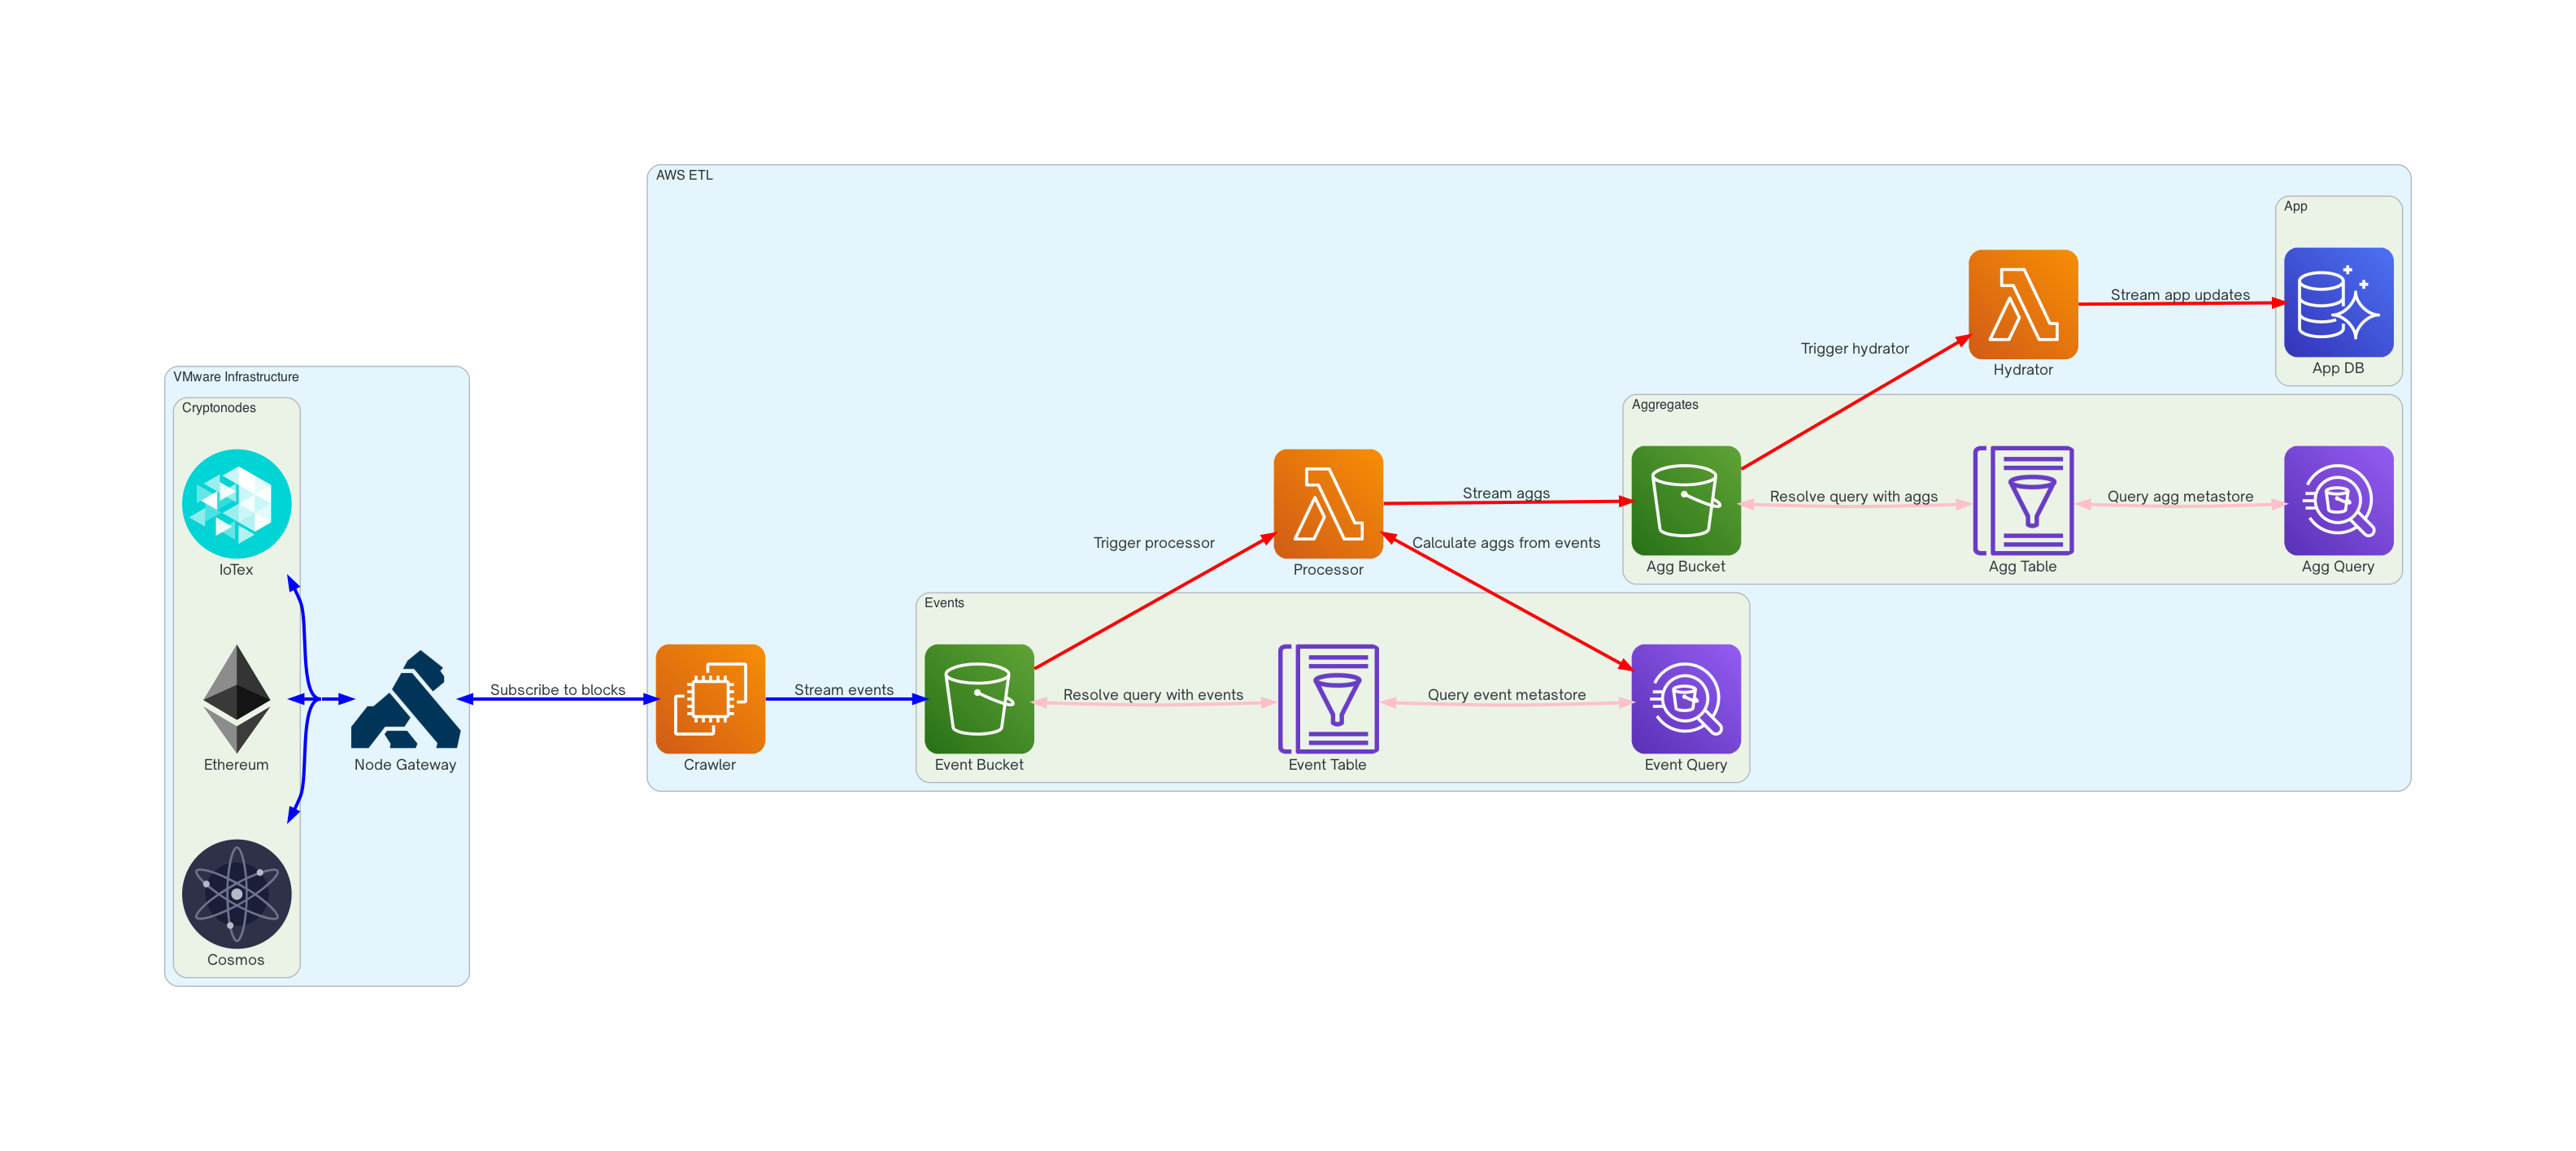

In [144]:
with Diagram(graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr, show=False, filename="_etl") as etl:

    with Cluster("VMware Infrastructure"):

        with Cluster("Cryptonodes"):
            cosmos = Custom("Cosmos", "resources/cosmos.png")
            ethereum = Custom("Ethereum", "resources/ethereum.png")
            iotex = Custom("IoTex", "resources/iotex.png")

        cryptonodes = [cosmos, ethereum, iotex]
        node_gateway = Kong("Node Gateway")
        cryptonodes >> Edge(color="blue") << node_gateway

    with Cluster("AWS ETL"):
        crawler = EC2("Crawler")
        processor = Lambda("Processor")
        hydrator = Lambda("Hydrator")

        with Cluster("Events"):
            event_bucket = S3("Event Bucket")
            event_table = GlueDataCatalog("Event Table")
            event_query = Athena("Event Query")

            event_bucket >> \
            Edge(label="Resolve query with events", color="pink", fontname="Open Sauce One") << \
            event_table >> \
            Edge(label="Query event metastore", color="pink", fontname="Open Sauce One") << \
            event_query

        with Cluster("Aggregates"):
            agg_bucket = S3("Agg Bucket")
            agg_table = GlueDataCatalog("Agg Table")
            agg_query = Athena("Agg Query")

            agg_bucket >> \
            Edge(label="Resolve query with aggs", color="pink", fontname="Open Sauce One") << \
            agg_table >> \
            Edge(label="Query agg metastore", color="pink", fontname="Open Sauce One") << \
            agg_query

        with Cluster("App"):
            app_db = Aurora("App DB")

        crawler >> Edge(label="Stream events", color="blue", fontname="Open Sauce One") >> event_bucket
        event_bucket >> \
        Edge(label="Trigger processor", color="red", fontname="Open Sauce One") >> \
        processor >> \
        Edge(label="Stream aggs", color="red", fontname="Open Sauce One") >> \
        agg_bucket >> \
        Edge(label="Trigger hydrator", color="red", fontname="Open Sauce One") >> \
        hydrator >> \
        Edge(label="Stream app updates", color="red", fontname="Open Sauce One") >> \
        app_db
        
        processor >> \
        Edge(label="Calculate aggs from events", color="red", fontname="Open Sauce One") << \
        event_query

        aws_etl = [crawler, event_bucket, event_table, event_query, processor, agg_bucket, agg_table, agg_query, hydrator, app_db]

    node_gateway >> Edge(label="Subscribe to blocks", color="blue", fontname="Open Sauce One") << crawler

etl

## SSV Architecture

> 🚧 This is a work in progress, consider the current diagram a placeholder with no actual impact on development.

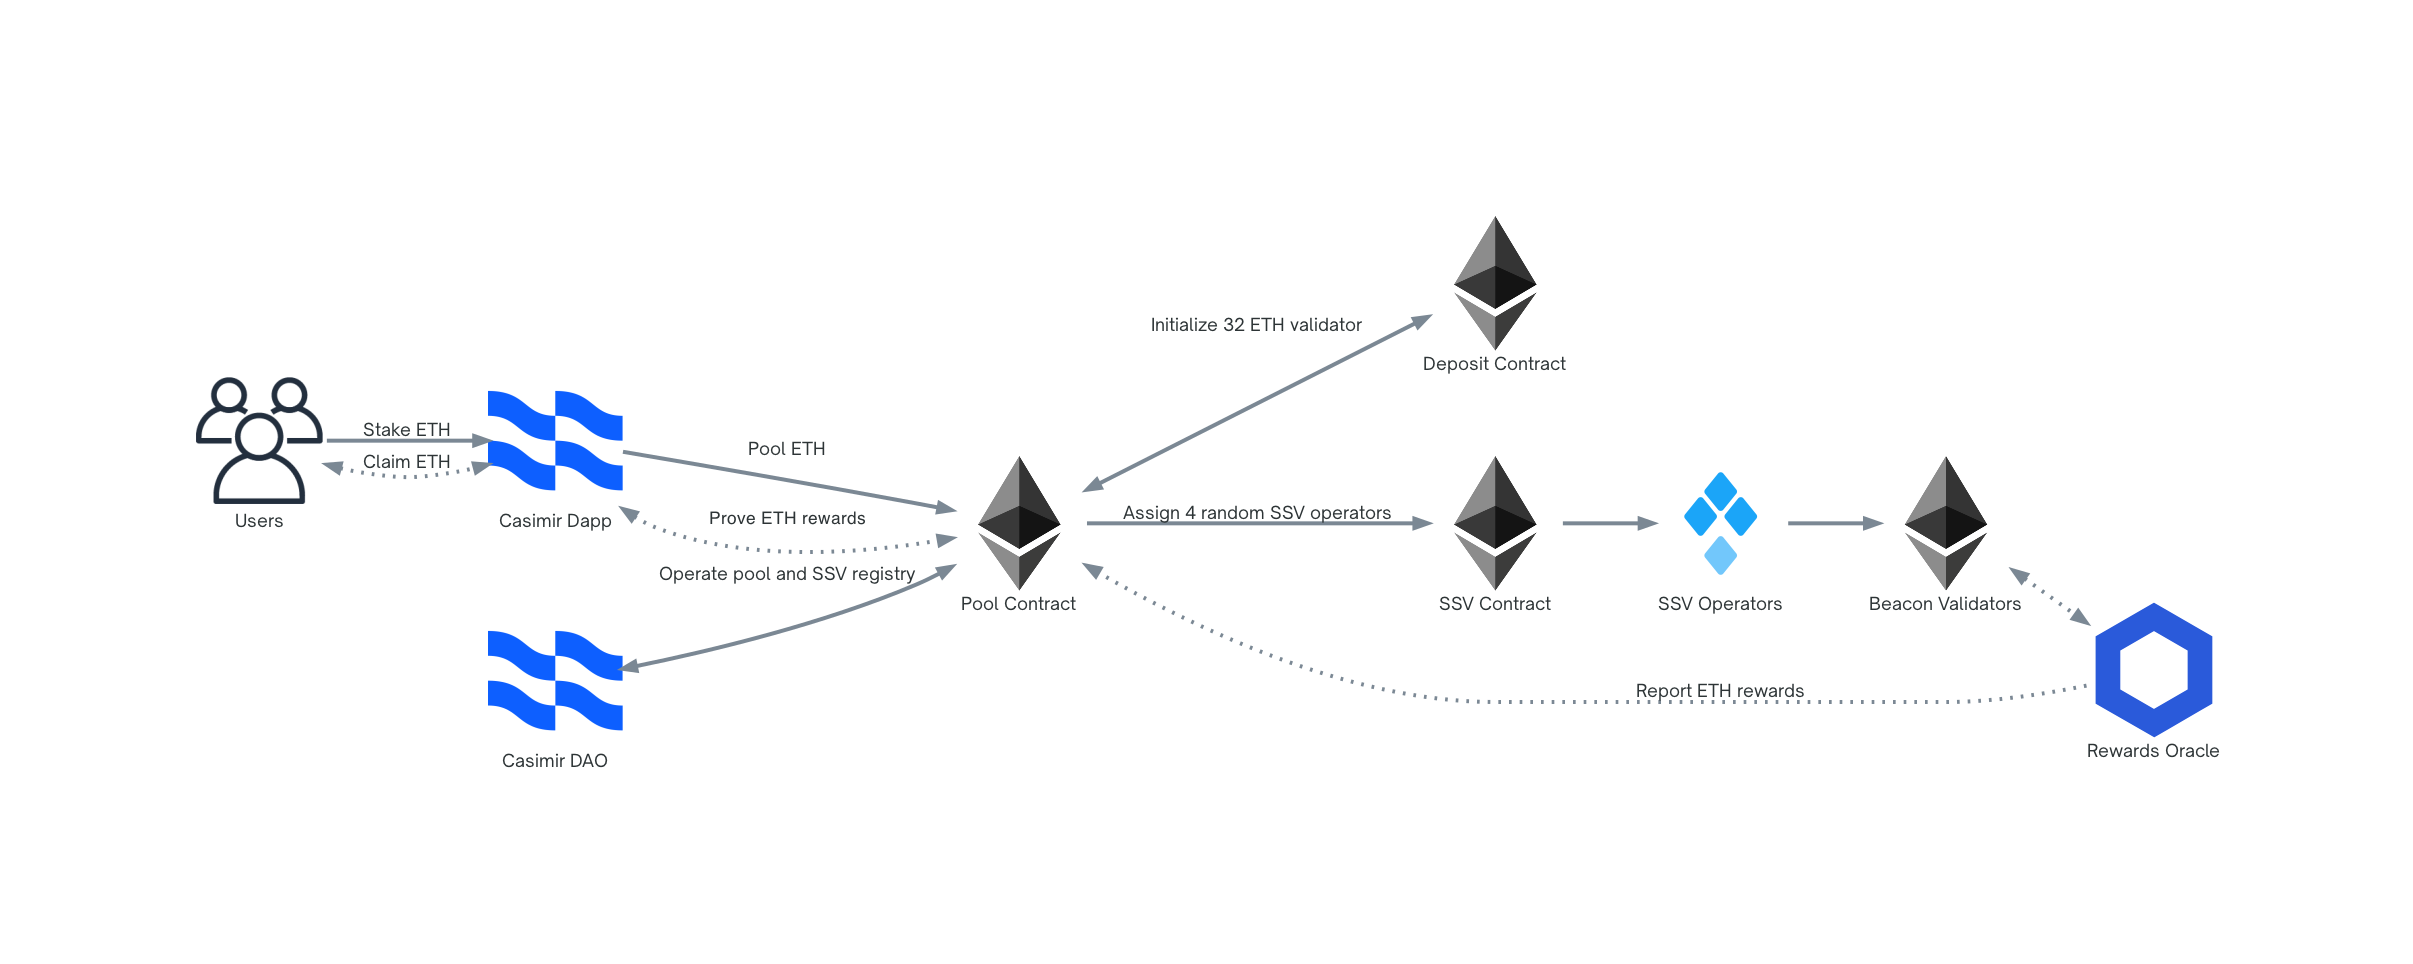

In [145]:
with Diagram(graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr, show=False, filename="_ssv") as ssv:
    
    users = Users("Users")
    casimir_dapp = Custom("Casimir Dapp", "resources/casimir.png")
    casimir_dao = Custom("Casimir DAO", "resources/casimir.png")
    pool_contract = Custom("Pool Contract", "resources/ethereum.png")
    deposit_contract = Custom("Deposit Contract", "resources/ethereum.png")
    ssv_contract = Custom("SSV Contract", "resources/ethereum.png")
    ssv_operators = Custom("SSV Operators", "resources/ssv.png")
    beacon_validators = Custom("Beacon Validators", "resources/ethereum.png")
    rewards_oracle = Custom("Rewards Oracle", "resources/chainlink.png")

    pool_contract >> Edge(label="Initialize 32 ETH validator", fontname="Open Sauce One") << deposit_contract
    pool_contract >> Edge(label="Assign 4 random SSV operators", fontname="Open Sauce One") >> \
    ssv_contract >> Edge(label="") >> \
    ssv_operators >> Edge(label="") >> \
    beacon_validators >> Edge(label="", style="dotted") << \
    rewards_oracle >> Edge(label="Report ETH rewards", fontname="Open Sauce One", style="dotted") >> \
    pool_contract
            
    stake_pool = [casimir_dao, pool_contract, deposit_contract, ssv_contract]

    casimir_dao >> Edge(label="Operate pool and SSV registry", fontname="Open Sauce One") << pool_contract

    users >> Edge(label="Stake ETH", fontname="Open Sauce One") >> \
    casimir_dapp >> Edge(label="Pool ETH", fontname="Open Sauce One") >> \
    pool_contract

    users >> Edge(label="Claim ETH", fontname="Open Sauce One", style="dotted") << casimir_dapp >> Edge(label="Prove ETH rewards", style="dotted") << pool_contract
ssv